Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
from functools import reduce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from imblearn.over_sampling import SMOTE

In [ ]:
!unzip "/content/archive (6).zip"

Archive:  /content/archive (6).zip
  inflating: survey lung cancer.csv  


Loading and Preprocessing Data

In [ ]:
# Load the dataset
data = pd.read_csv('survey lung cancer.csv')

# Display the first few rows of the dataset
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,69,1,2,2,1,1,2,1,2,2,2,2,2,2,YES
1,M,74,2,1,1,1,2,2,2,1,1,1,2,2,2,YES
2,F,59,1,1,1,2,1,2,1,2,1,2,2,1,2,NO
3,M,63,2,2,2,1,1,1,1,1,2,1,1,2,2,NO
4,F,63,1,2,1,1,1,1,1,2,1,2,2,1,1,NO


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    int64 
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
data.shape

(309, 16)

In [ ]:
data.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
GENDER,309.0,0.475728,0.500221,0.0,0.0,0.0,1.0,1.0
AGE,309.0,62.673139,8.210301,21.0,57.0,62.0,69.0,87.0
SMOKING,309.0,1.563107,0.496806,1.0,1.0,2.0,2.0,2.0
YELLOW_FINGERS,309.0,1.569579,0.495938,1.0,1.0,2.0,2.0,2.0
ANXIETY,309.0,1.498382,0.500808,1.0,1.0,1.0,2.0,2.0
PEER_PRESSURE,309.0,1.501618,0.500808,1.0,1.0,2.0,2.0,2.0
CHRONIC DISEASE,309.0,1.504854,0.500787,1.0,1.0,2.0,2.0,2.0
FATIGUE,309.0,1.673139,0.469827,1.0,1.0,2.0,2.0,2.0
ALLERGY,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0
WHEEZING,309.0,1.556634,0.497588,1.0,1.0,2.0,2.0,2.0


In [ ]:
data['LUNG_CANCER'].unique()

array(['YES', 'NO'], dtype=object)

In [ ]:
data['LUNG_CANCER'].value_counts(normalize=True)

LUNG_CANCER
YES    0.873786
NO     0.126214
Name: proportion, dtype: float64

Encoding Categorical Data

In [ ]:
# Converting categorical variables to numerical
data['GENDER'] = data['GENDER'].map({'M': 0, 'F': 1})

In [ ]:
data['LUNG_CANCER'] = data['LUNG_CANCER'].map({'YES': 1 ,'NO' :0})

In [ ]:
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,0,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,0,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,1,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,0,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,1,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


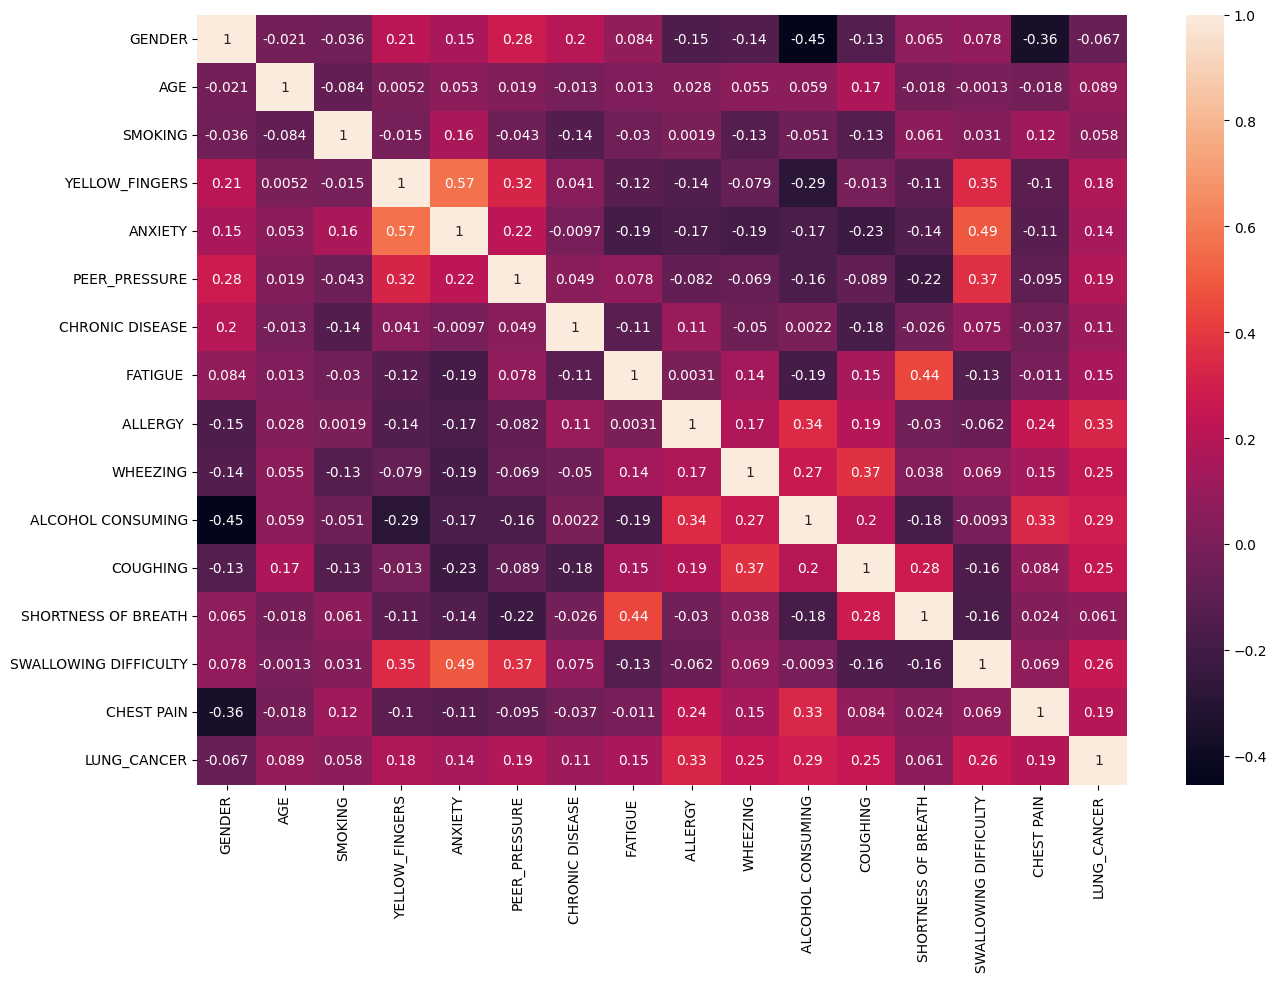

In [ ]:
correlation = data.corr()
ax = sns.heatmap(correlation,annot =True)
ax.figure.set_size_inches(15,10)

Splitting the Dataset

In [ ]:
X = data.drop('LUNG_CANCER', axis=1)
y = data['LUNG_CANCER']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
y_train.value_counts(normalize=True)


LUNG_CANCER
1    0.850202
0    0.149798
Name: proportion, dtype: float64

In [ ]:
from sklearn.tree import DecisionTreeClassifier
model_class = DecisionTreeClassifier(random_state=42)

In [ ]:
model_class.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = model_class.predict(X_test)

In [ ]:
y_pred_train = model_class.predict(X_train)

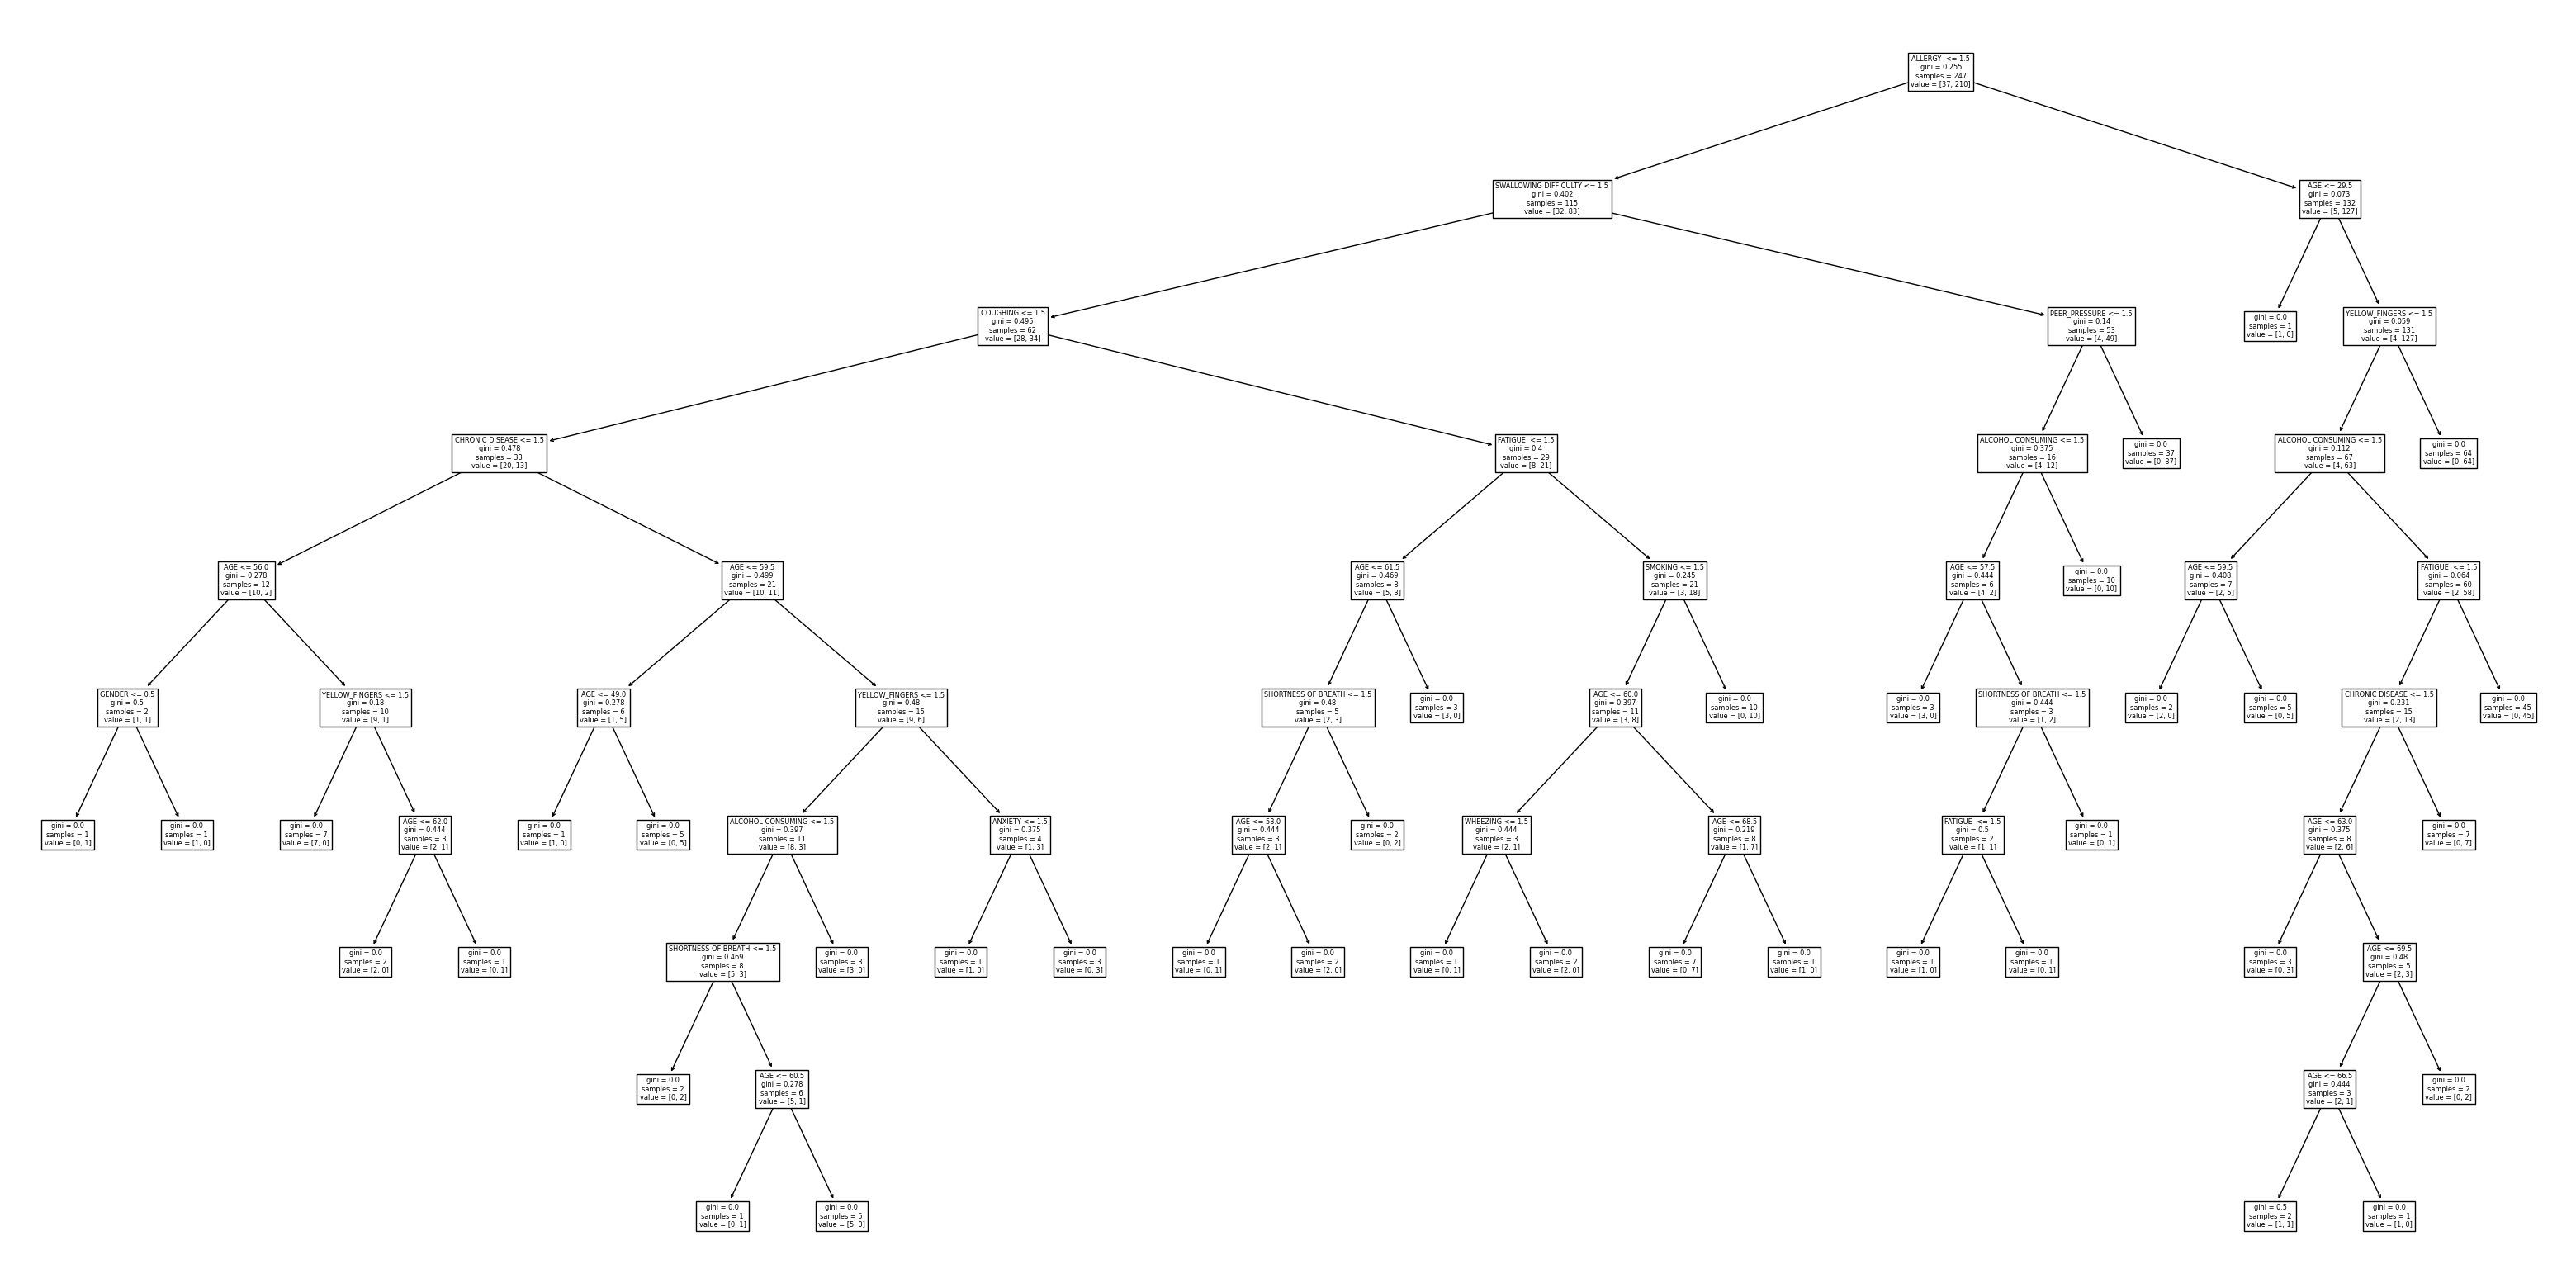

In [ ]:
plt.figure(figsize=(40, 20))
tree.plot_tree(model_class, feature_names=X_train.columns)
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62



In [ ]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       1.00      1.00      1.00       210

    accuracy                           1.00       247
   macro avg       0.99      1.00      0.99       247
weighted avg       1.00      1.00      1.00       247



In [ ]:
class_model = DecisionTreeClassifier(random_state=42, max_depth=4)
class_model.fit(X_train, y_train)
y_pred = class_model.predict(X_test)

In [ ]:
y_pred_train = class_model.predict(X_train)

print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.74      0.54      0.62        37
           1       0.92      0.97      0.94       210

    accuracy                           0.90       247
   macro avg       0.83      0.75      0.78       247
weighted avg       0.90      0.90      0.90       247



In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.97      0.97      0.97        60

    accuracy                           0.94        62
   macro avg       0.48      0.48      0.48        62
weighted avg       0.94      0.94      0.94        62



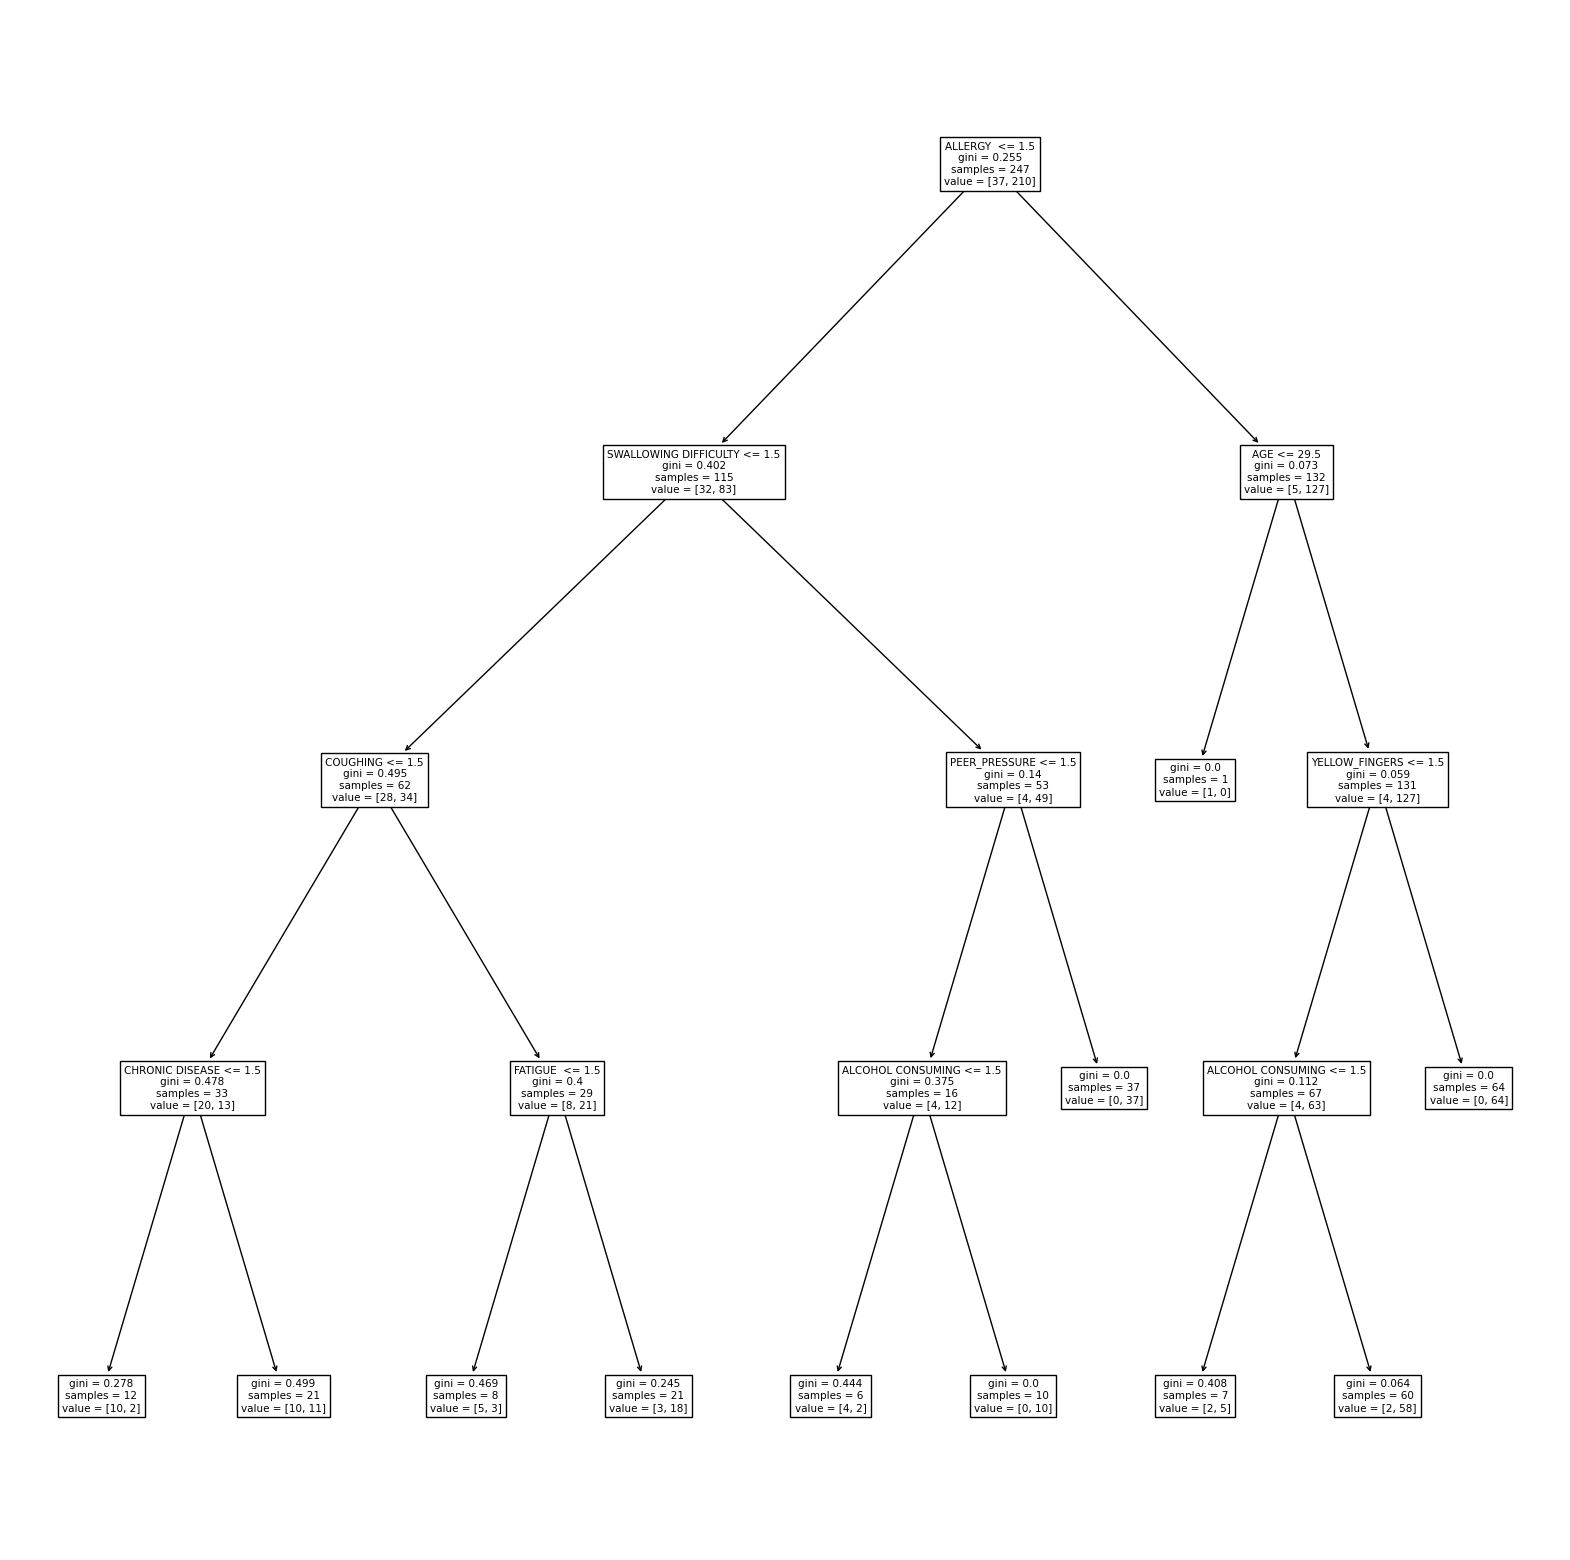

In [ ]:
plt.figure(figsize=(20, 20))
tree.plot_tree(class_model, feature_names=X_train.columns)
plt.show()

In [ ]:
X_train.shape

(247, 15)

In [ ]:
smote = SMOTE(sampling_strategy = 'minority', random_state=42)
X_over, y_over = smote.fit_resample(X_train,y_train)

In [ ]:
np.unique(y_train, return_counts=True)

(array([0, 1]), array([ 37, 210]))

In [ ]:
np.unique(y_over, return_counts=True)

(array([0, 1]), array([210, 210]))

In [ ]:
X_train_over, X_test_over, y_train_over, y_test_over = train_test_split(X_over,y_over,test_size=0.2, random_state=42)
X_train_over.shape,X_test_over.shape

((336, 15), (84, 15))

In [ ]:
random_forest_lung_over = RandomForestClassifier(n_estimators=100, criterion='gini', random_state=42, max_depth=5)
random_forest_lung_over.fit(X_train_over,y_train_over)

RandomForestClassifier(max_depth=5, random_state=42)

In [ ]:
y_pred_over = random_forest_lung_over.predict(X_test_over)
accuracy_score(y_test_over,y_pred_over)

0.9404761904761905

In [ ]:
print(classification_report(y_test_over,y_pred_over))

              precision    recall  f1-score   support

           0       0.90      0.97      0.94        38
           1       0.98      0.91      0.94        46

    accuracy                           0.94        84
   macro avg       0.94      0.94      0.94        84
weighted avg       0.94      0.94      0.94        84



In [ ]:
y_pred_train_over = random_forest_lung_over.predict(X_train_over)
print(classification_report(y_train_over,y_pred_train_over))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       172
           1       0.99      0.96      0.97       164

    accuracy                           0.97       336
   macro avg       0.97      0.97      0.97       336
weighted avg       0.97      0.97      0.97       336



KNN CLASSIFIER

In [ ]:
scaler_train = StandardScaler()
X_train_std = scaler_train.fit_transform(X_train_over)

In [ ]:
scaler_test = StandardScaler()
X_test_std = scaler_test.fit_transform(X_test_over)

In [ ]:
model_KNN = KNeighborsClassifier(n_neighbors=5)

In [ ]:
model_KNN.fit(X_train_std, y_train_over)

KNeighborsClassifier()

In [ ]:
y_pred_knn = model_KNN.predict(X_test_std)

In [ ]:
print(classification_report(y_test_over, y_pred_knn))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.98      0.93      0.96        46

    accuracy                           0.95        84
   macro avg       0.95      0.95      0.95        84
weighted avg       0.95      0.95      0.95        84



In [ ]:
y_pred_train_knn = model_KNN.predict(X_train_std)

In [ ]:
print(classification_report(y_train_over, y_pred_train_knn))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       172
           1       0.98      0.95      0.97       164

    accuracy                           0.97       336
   macro avg       0.97      0.97      0.97       336
weighted avg       0.97      0.97      0.97       336

